In [24]:
from tools.functions import *
from generate_data import *

In [25]:
# Add two models to compare

output_model_0 = load_output("base_100_08init", path="output_small_network/")
output_model_1 = load_output("neurogenesis_100_08_sparse", path="output_small_network/") 
output_model_2 = load_output("neurogenesis_100_08_sparse_1", path="output_small_network/")
#output_model_2 = load_output("ageing_100_turnover_6", path="output_small_network/") 


model_identifyer = (
                "Base",
                "Sparse",
                "Sparser",
                "Ageing_threshold_8_connect",
                "Ageing_turnover_8_connect"
                )

outputs = (
        output_model_0, 
        output_model_1, 
        output_model_2, 
        #output_model_3, 
        #output_model_4
        )


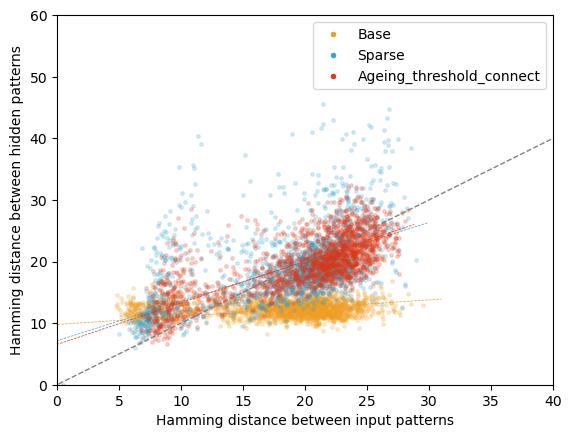

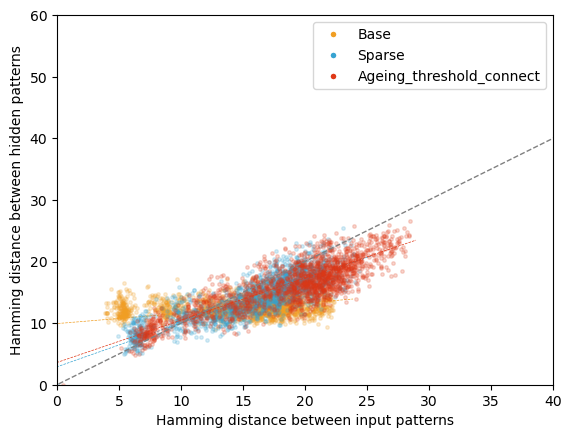

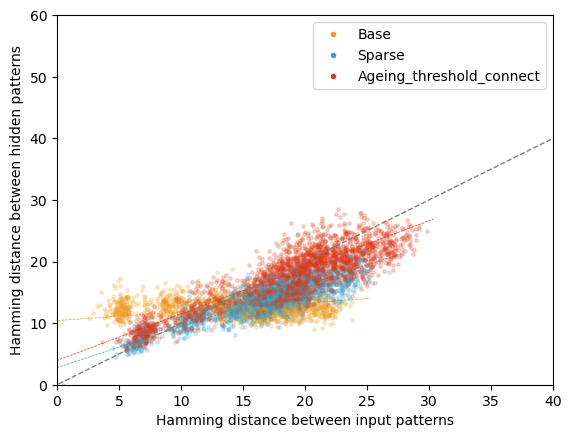

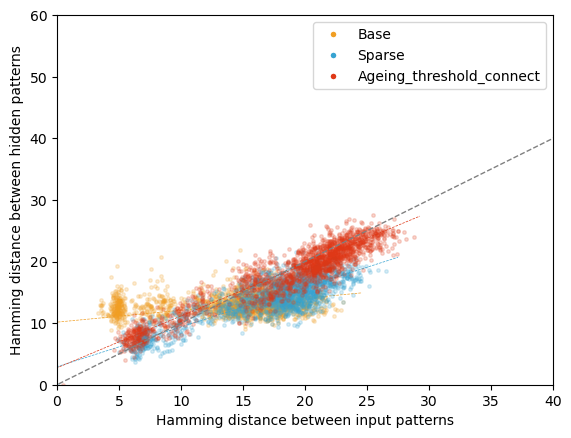

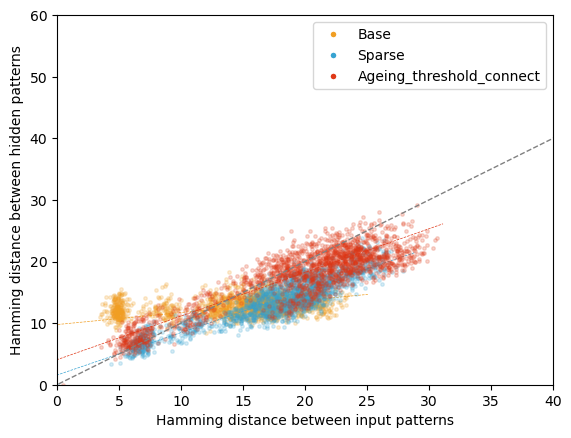

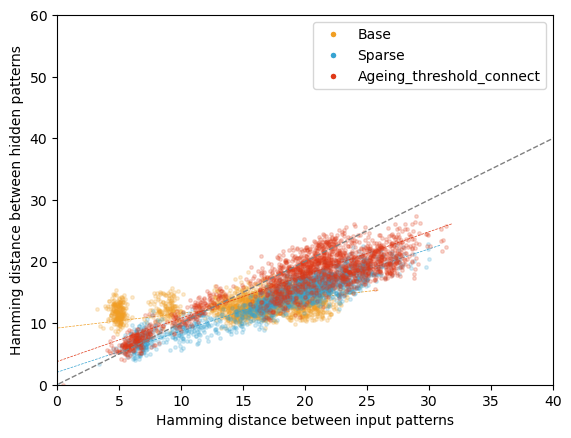

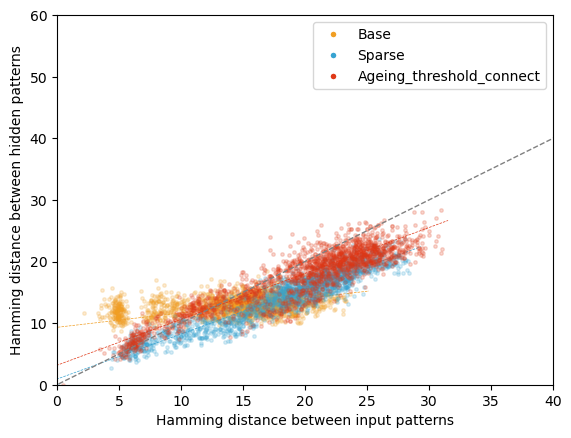

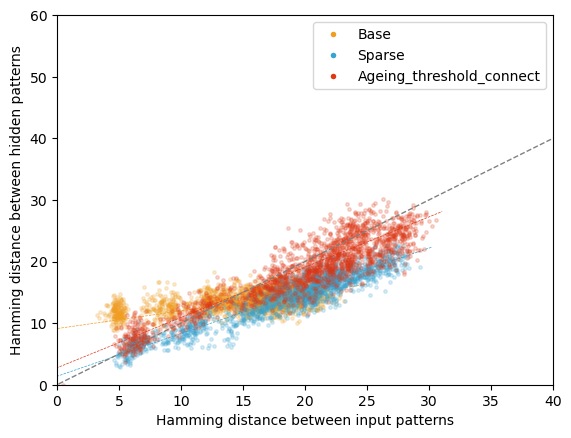

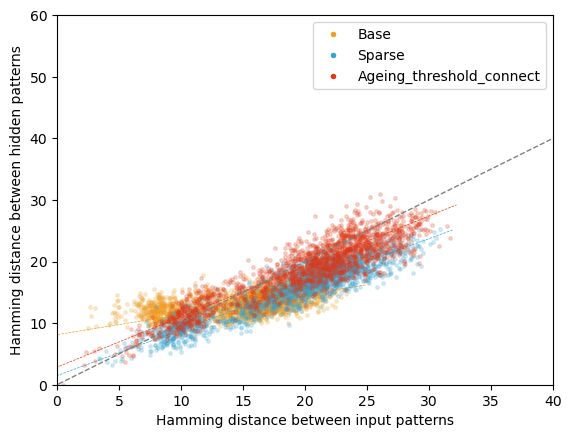

In [26]:
colors = [[0.941, 0.62 , 0.137], [0.216, 0.639, 0.82], [0.875, 0.22 , 0.09], [0.322, 0.714, 0.345], [0.788, 0.373, 0.773]]
ylim = (0, 60)
xlim = (0, 40)
normalize = True
binarize = False
threshold = 0.9
go_through_origin = False
plot_3rd_order = False

split = np.linspace(0, 1, 10)
#split = [0, 0.25, 0.5,  0.85, 1]

for i in range(len(split)-1):
    plot_input_output_curves(outputs, model_identifyer, alpha = 0.2,
                        off_time = 1, 
                        plot_3rd_order = plot_3rd_order, 
                        plot_error_bars=False, 
                        normalize=normalize,
                        binarize=binarize, 
                        threshold=threshold,
                        go_through_origin=go_through_origin,
                        split = (split[i],split[i+1]), ylimit = ylim, xlimit = xlim, 
                        colors = colors
                        )


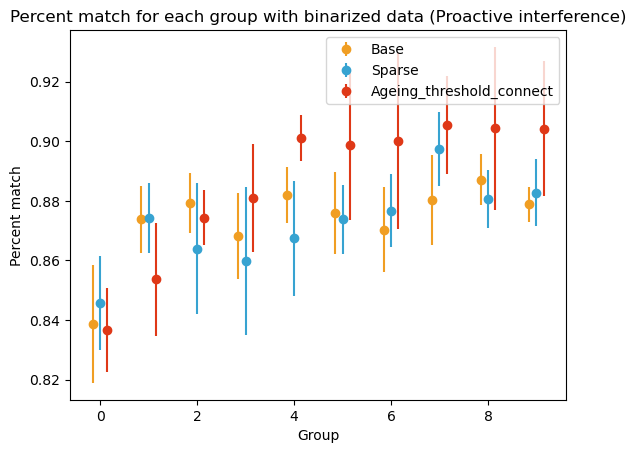

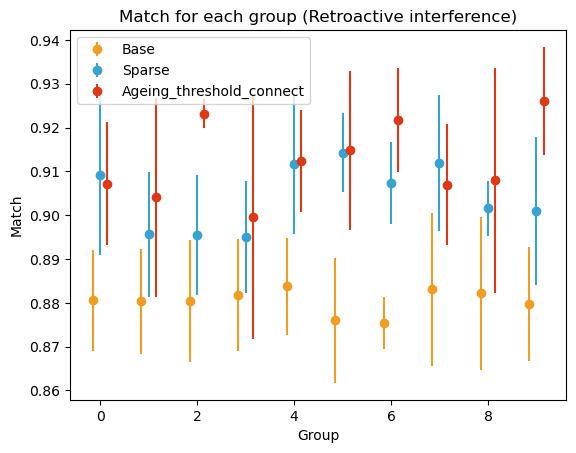

In [27]:
# This calculates the hamming distances and percent match for all test patterns. 
# It uses the spike moitor ant the timepoints where the stimuli are presented
off_time = 1 # How many stimulus periods are used for recoverey period histogram

colors = [[0.941, 0.62 , 0.137], [0.216, 0.639, 0.82], [0.875, 0.22 , 0.09], [0.322, 0.714, 0.345], [0.788, 0.373, 0.773]]

threshold = [100, 150, 200]
binarize = False
normalize = True

space = -0.15
j = 0
for output in outputs:
    Mv_loaded = output["Mv"]
    Mh_loaded = output["Mh"]
    time_test_on = output["time_test_on"]
    time_points_dict = output["time_points_dict"]
    n_seed_patterns = output["n_seed_patterns"]
    n_prototype_per_seed = output["n_prototype_per_seed"]
    n_variations_per_prototype = output["n_variations_per_prototype"]
    after_split_n_per_prototype_test = output["after_split_n_per_prototype_test"]

    hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, normalize=normalize,
                                                                                    binarize = binarize, threshold = threshold)
    hd_table_between = np.array(hamming_distances[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    pm_table_between = np.array(percent_match[:10 * after_split_n_per_prototype_test * n_seed_patterns]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    means_between = np.mean(pm_table_between, axis=1)
    stds_between = np.std(pm_table_between, axis=1)

    plt.errorbar(np.arange(10)+space, means_between, stds_between, linestyle='None', marker='o', color=colors[j])
    plt.xlabel("Group")
    plt.ylabel("Percent match")
    plt.title("Percent match for each group with binarized data (Proactive interference)")
    #plt.ylim(0.5, 1)
    space += 0.15

    ## This is probably wrong!
    """ tst = pattern_separation_efficacy_model(Mv_loaded, Mh_loaded, time_points_dict, n_seed_patterns, 
                                        n_prototype_per_seed, after_split_n_per_prototype_test, time_test_on,
                                        selection = "group", convert_to_hz=True, to_binary=binarize, threshold=threshold, report=False)
    pattern_separation = np.mean(np.mean(tst, axis=0)[np.mean(tst, axis=0) != 0])
    print("Pattern separation efficacy: " + model_identifyer[j] + " " + str(pattern_separation)) """

    j += 1
plt.legend(model_identifyer)  
plt.show()


# Second plot 

space = -0.15
j = 0



for output in outputs:
    Mv_loaded = output["Mv"]
    Mh_loaded = output["Mh"]
    time_test_on = output["time_test_on"]
    time_points_dict = output["time_points_dict"]
    n_seed_patterns = output["n_seed_patterns"]
    n_prototype_per_seed = output["n_prototype_per_seed"]
    n_variations_per_prototype = output["n_variations_per_prototype"]
    after_split_n_per_prototype_test = output["after_split_n_per_prototype_test"]

    hamming_distances, percent_match, originals, recovered = hamming_distances_test(Mv_loaded, time_test_on, time_points_dict, off_time=off_time, normalize=normalize,
                                                                                    binarize = binarize, threshold = threshold)

    
    hd_table_within = np.array(hamming_distances[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    pm_table_within = np.array(percent_match[10 * after_split_n_per_prototype_test * n_seed_patterns:]).reshape(10, after_split_n_per_prototype_test * n_seed_patterns)
    means_within = np.mean(pm_table_within, axis=1)
    stds_within = np.std(pm_table_within, axis=1)

    plt.errorbar(np.arange(10)+space, means_within, stds_within, linestyle='None', marker='o', color=colors[j])
    plt.xlabel("Group")
    plt.ylabel("Match")
    plt.title("Match for each group (Retroactive interference)")
    #plt.ylim(0.5, 1)
    space += 0.15
    j += 1
plt.legend(model_identifyer)
plt.show()

